In [19]:
import numpy as np

In [20]:
class Tensor:

    def __init__(self, data, label=''):
        self.data = data
        self.grad = 0.0
        self.childrens = []
        self.operation = ''
        self._backward = lambda:None
        self.label = label

    # Addition
    def __add__(self,other):
        if not isinstance(other, Tensor):
            other = Tensor(other)
        
        res_obj = Tensor(self.data + other.data)
        res_obj.childrens+=[self, other]
        res_obj.operation = '+'
        
        def _backward():
            self.grad = res_obj.grad * 1.0
            other.grad = res_obj.grad * 1.0
        res_obj._backward = _backward
        
        return res_obj
    
    def __radd__(self, other):
        other = Tensor(other)
        res_obj = Tensor(self.data + other.data)
        res_obj.childrens+=[other, self]
        res_obj.operation = '+'
        
        return res_obj
    
    # Multiplication
    def __mul__(self,other):             
        if not isinstance(other, Tensor):
            other = Tensor(other)
        
        res_obj = Tensor(self.data * other.data) 
        res_obj.childrens+=[self, other]
        res_obj.operation = '*'
        
        def _backward():
            self.grad = res_obj.grad * other.data
            other.grad = res_obj.grad * self.data
        res_obj._backward = _backward
        
        return res_obj
    
    def __rmul__(self, other):
        other = Tensor(other)
        res_obj = Tensor(self.data * other.data)
        res_obj.childrens+=[other, self]
        res_obj.operation = '*'
        return res_obj
    
    
    def __repr__(self):
        return f"Tensor({self.data})"

In [21]:
a = Tensor(3.0, label = 'a')
b = Tensor(9.0, label = 'b')
c = Tensor(6.0, label = 'c')
d = Tensor(5.0, label = 'd')
e = Tensor(1.0, label = 'e')
f = a * b; f.label = 'f'
g = f + c; g.label = 'g'
h = g + d; h.label = 'h'
i = h * e; i.label = 'i'
i

Tensor(38.0)

In [22]:
i.childrens

[Tensor(38.0), Tensor(1.0)]

In [23]:
i.operation

'*'

In [24]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.childrens:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n.operation:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.operation, label = n.operation)
      # and connect this node to it
      dot.edge(uid + n.operation, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.operation)

  return dot

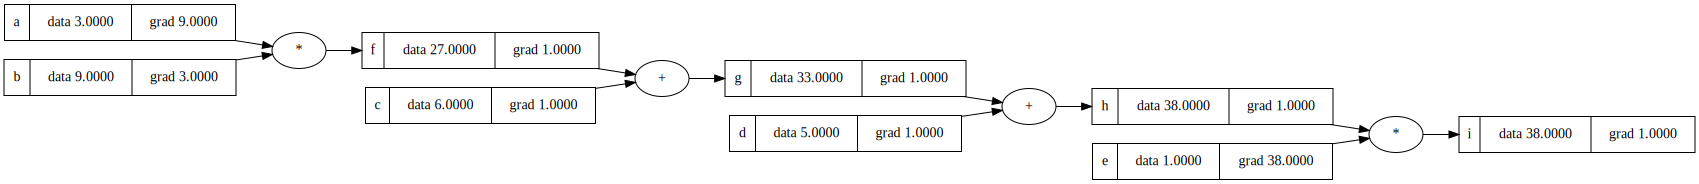

In [35]:
draw_dot(i)

In [26]:
i.grad = 1.0

In [31]:
i._backward()

In [32]:
h._backward()

In [33]:
g._backward()

In [34]:
f._backward()

In [19]:
import random
import numpy as np

In [20]:
x = [np.array(random.uniform(-1,1)) for _ in range(10)]
x

[array(0.31797591),
 array(-0.64197888),
 array(0.02196568),
 array(-0.77081094),
 array(-0.4552368),
 array(0.73275572),
 array(-0.75956854),
 array(0.59116328),
 array(-0.88371987),
 array(0.31062294)]